In [1]:
import itertools as it

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn import preprocessing
from sklearn import feature_extraction

%matplotlib inline

# How Much is Your Car Worth?

Data about the retail price of 2005 General Motors cars can be found in `car_data.csv`.

The columns are:

1. Price: suggested retail price of the used 2005 GM car in excellent condition.
2. Mileage: number of miles the car has been driven
3. Make: manufacturer of the car such as Saturn, Pontiac, and Chevrolet
4. Model: specific models for each car manufacturer such as Ion, Vibe, Cavalier
5. Trim (of car): specific type of car model such as SE Sedan 4D, Quad Coupe 2D          
6. Type: body type such as sedan, coupe, etc.      
7. Cylinder: number of cylinders in the engine        
8. Liter: a more specific measure of engine size     
9. Doors: number of doors           
10. Cruise: indicator variable representing whether the car has cruise control (1 = cruise)
11. Sound: indicator variable representing whether the car has upgraded speakers (1 = upgraded)
12. Leather: indicator variable representing whether the car has leather seats (1 = leather)

In [2]:
cars = pd.read_csv("car_data.csv")
cars.head()
#cars.columns

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


## Tasks, Part 1

1. Find the linear regression equation for mileage vs price.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

/Users/nrogers/Desktop/IronYard/car-worth-linear-regression/.direnv/python-3.5.1/lib/python3.5/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


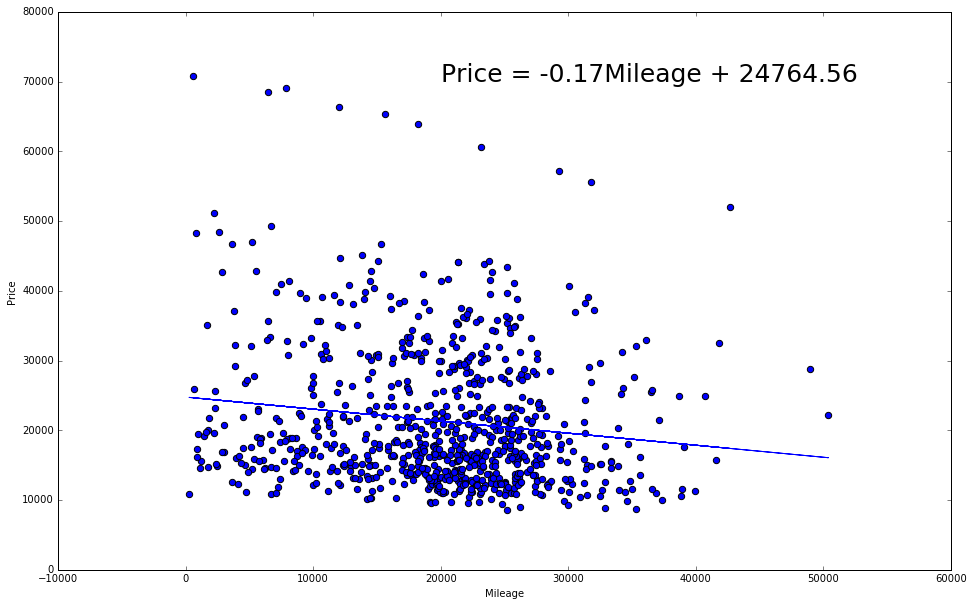

In [3]:
miles_price_linreg = linear_model.LinearRegression()
miles_price_fit = miles_price_linreg.fit(cars[['Mileage']], cars[['Price']])
cars.plot(kind='scatter', x='Mileage', y='Price', figsize=(16,10), s=40)
plt.plot(cars[['Mileage']], miles_price_linreg.predict(cars[['Mileage']]))
mp_int = miles_price_linreg.intercept_[0]
mp_coef = miles_price_linreg.coef_[0][0]
mp_text = 'Price = {:.2f}Mileage + {:.2f}'.format(mp_coef, mp_int)
plt.text(20000, 70000, mp_text, fontsize=25)

In [4]:
print('Coefficient of Determination (r^2): %.3f' % miles_price_linreg.score(cars[['Mileage']], cars[['Price']]))

Coefficient of Determination (r^2): 0.020


This equation is a poor fit for this data.

## Tasks, Part 2

1. Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.
2. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
3. Find the combination of the factors that is the best predictor for price.

In [5]:
features = ['Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather']
high_var = 0
high_var_coefs = []
high_var_int = 0
high_var_features = []

for i in range(1, len(features) + 1):    
    categories = list(it.combinations(features, i))

    for category in categories:    
        category = list(category)
        regr = linear_model.LinearRegression()
        regr.fit(cars[category], cars[['Price']])
        
        variance = regr.score(cars[category], cars[['Price']])
        if variance > high_var:
            high_var = variance
            high_var_coefs = regr.coef_[0]
            high_var_int = regr.intercept_[0]
            high_var_features = category

print("""
Best Predictor Factors: {}
Coefficient of Determination (r^2): {:.3f}
Coefficients: {}
Intercept: {:.3f}
""".format(high_var_features, high_var, high_var_coefs, high_var_int))


Best Predictor Factors: ['Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather']
Coefficient of Determination (r^2): 0.446
Coefficients: [ -1.69747832e-01   3.79237893e+03  -7.87220732e+02  -1.54274585e+03
   6.28899715e+03  -1.99379528e+03   3.34936162e+03]
Intercept: 6758.755



The equations produced are poor predictors of price, as the highest coefficient of determination is 0.446.  

## Tasks, Part 3

1. Research dummy variables in scikit-learn to see how to use the make, model, and body type.
2. Find the best combination of factors to predict price.

In [6]:
np.random.seed(121212)
cars.groupby(['Make', 'Type', 'Model','Trim']).size().head()

Make   Type   Model     Trim           
Buick  Sedan  Century   Sedan 4D           10
              Lacrosse  CX Sedan 4D        10
                        CXL Sedan 4D       10
                        CXS Sedan 4D       10
              Lesabre   Custom Sedan 4D    10
dtype: int64

I chose to toss out "Trim" because it was probably something that should have been a dummy variable, and the question did not ask to use this in the analysis.  

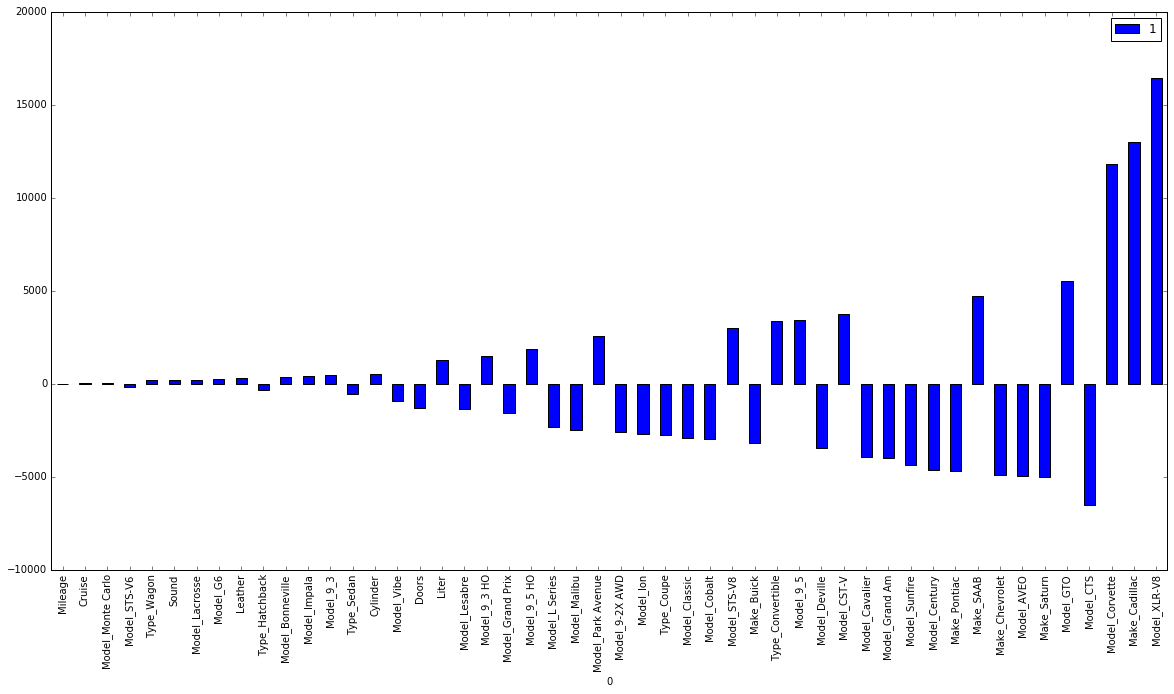

In [7]:
cars_2 = cars.drop('Trim', 1)
cars_dummy = pd.get_dummies(cars_2)
features = cars_dummy.columns[1:]

dummy_regr = linear_model.LinearRegression()
dummy_fit = dummy_regr.fit(cars_dummy[features], cars_dummy['Price'])
dummy_regr.score(cars_dummy[features], cars_dummy['Price'])

sorted_coefs = sorted(list(zip(features, dummy_regr.coef_)), key=lambda x: abs(x[1]))

coefs = pd.DataFrame(sorted_coefs)
coefs = coefs.set_index(0)
coefs.plot.bar(figsize=(20,10))

In [8]:
scores = []
for feature in features:
    dummy_regr = linear_model.LinearRegression()
    dummy_fit = dummy_regr.fit(cars_dummy[[feature]], cars_dummy['Price'])
    score = dummy_regr.score(cars_dummy[[feature]], cars_dummy['Price'])
    scores.append(score)

sorted_scores = sorted(list(zip(features, scores)), key=lambda x: x[1])
    
r2 = pd.DataFrame(srt_sc)
r2 = r2.set_index(0)
r2.plot.bar(figsize=(20,10))

NameError: name 'srt_sc' is not defined